The data shows the information of American colleges and universities in 1995, the detail as below. And we would like to classify good colleges and universities. <br>
[ACollege1995R.csv] Columns:<br>
app - No. of applicants received<br>
acc - No. of applicants accepted<br>
enrol - No. of new students enrolled<br>
ftime - No. of full-time undergraduates<br>
ptime - No. of part-time undergraduate<br>
instate - In-state tuition<br>
outstate - Out-state tuition<br>
rbcost - Room and board cost<br>
bkcost - Estimated book cost<br>
phd - % of faculty with Ph.D.<br>
sfratio - Student/faculty ratio<br>
expend - Instructional expenditure per student<br>
grad - Graduation rate<br>
good (skip) - With 30%+ new students from top 10% high school class.

In [1]:
set.seed(852)
data = read.csv('../ACollege1995R2.csv')

In [2]:
stand<-function(x) {
   n<-dim(x)[1]
   p<-dim(x)[2]
   m<-apply(x,2,mean)
   s<-apply(x,2,sd)
   m<-matrix(m,nr=n,nc=p,byrow=T)
   s<-matrix(s,nr=n,nc=p,byrow=T)
   (x-m)/s
}

In [3]:
kmstat<-function(x,k) {
  km<-kmeans(x,k)
  ng<-km$size
  n<-dim(x)[1]
  ssw<-sum(km$withinss)
  ssb<-km$betweenss
  out<-list((n-k)*ssb/((k-1)*ssw),ng,km$cluster)
  names(out)<-c("stat","size","cluster")
  out
}

In [4]:
km<-function(x,k,try=5) {
  res0<-kmstat(x,k)
  r0<-res0$stat
  for (i in 2:try) {
    res<-kmstat(x,k)
    if (res$stat>r0) {
      r0<-res$stat
      res0<-res
    }
  }
  cat("cluster size=",res0$size,"\n")
  cat("stat=",res0$stat,"\n")
  res0$cluster
}

K-means is sensitive to the scales, the variables should be standardized before clustering.

In [5]:
sdata = stand(data)
head(sdata)

app,acc,enrol,ftime,ptime,instate,outstate,rbcost,bkcost,phd,sfratio,expend,grad,top10
-0.8527574,-0.8869562,-0.8694966,-0.7664787,0.1055483,-0.2413727,-0.5850801,-0.10432093,2.0419307,0.3509543,-0.6445234,0.56811254,-2.8510051,-0.57495750
-0.8712810,-0.9038552,-0.8204474,-0.7008337,1.0495614,-1.3750130,-1.1711688,0.48582708,-0.2499032,-1.9065296,-1.2625185,0.21035370,-1.4382789,-1.36843242
-0.3963675,-0.4522447,-0.1265461,-0.1894510,-0.4126956,-1.2818745,-1.3685406,-1.10317392,-1.7777924,0.1069020,1.1579625,-0.77923186,-0.7319158,-0.44271168
2.0459885,2.9852397,3.4800097,3.5593378,0.9214454,-1.3052565,-0.9014776,-0.27568378,0.5140414,0.9000720,0.5914670,-0.57628794,0.3276289,0.02014870
-0.6115565,-0.6293925,-0.5348082,-0.4620263,-0.5321422,0.5575145,0.4444675,0.08353675,-1.0138478,0.2289282,-0.1037776,-0.03964968,0.5042197,2.79731094
-0.6891980,-0.6690177,-0.7656277,-0.6884070,-0.6101677,-0.1400504,-0.4545033,-0.28759671,-0.2499032,-0.4422157,-0.7732724,-0.29259427,-1.1439609,0.08627161


In [6]:
km2 = km(sdata, 2, try=20)
km3 = km(sdata, 3, try=20) # Highest stat value
km4 = km(sdata, 4, try=20)
km5 = km(sdata, 5, try=20)
km6 = km(sdata, 6, try=20)

cluster size= 169 658 
stat= 275.0246 
cluster size= 135 427 265 
stat= 319.4974 
cluster size= 185 373 62 207 
stat= 275.2495 
cluster size= 141 92 59 260 275 
stat= 251.5966 
cluster size= 229 50 141 106 70 231 
stat= 224.6779 


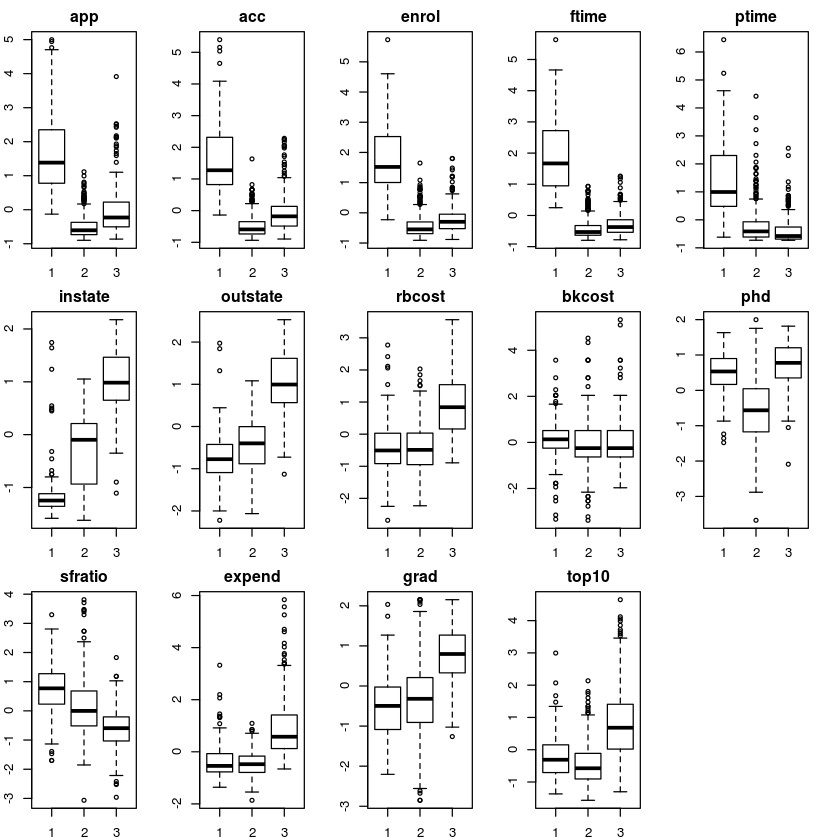

In [7]:
par(mar=c(2,2,2,2),mfrow=c(3,5))
lab = factor(km3)
plot(lab, sdata$app,main="app")
plot(lab, sdata$acc,main="acc")
plot(lab, sdata$enrol,main="enrol")
plot(lab, sdata$ftime,main="ftime")
plot(lab, sdata$ptime,main="ptime")
plot(lab, sdata$instate,main="instate")
plot(lab, sdata$outstate,main="outstate")
plot(lab, sdata$rbcost,main="rbcost")
plot(lab, sdata$bkcost,main="bkcost")
plot(lab, sdata$phd,main="phd") 
plot(lab, sdata$sfratio,main="sfratio") 
plot(lab, sdata$expend,main="expend") 
plot(lab, sdata$grad,main="grad") 
plot(lab, sdata$top10,main="top10")

# Conclusion

## Cluster 1
Lower phd

## Cluster 2

Higher instate, outstate, rbcost, expend, grad, top10

## Cluster 3
Higher app, acc, enrol, ftime, ptime